# Sentiment Analysis Using Deep Learning
---

## 1. Data Preprocessing

Firstly, let's import the dataset

In [1]:
import pandas as pd
import os

In [2]:
dataset_path = 'ENG_SA_Dataset.csv'

if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path)
    
    print("Dataset loaded successfully!")
    print(data.head())
else:
    print(f"File not found at {dataset_path}. Please check the path and try again.")

Dataset loaded successfully!
      id                                               text  label sentiment
0   9536                    Cooking microwave pizzas, yummy      2  positive
1   6135  Any plans of allowing sub tasks to show up in ...      1   neutral
2  17697   I love the humor, I just reworded it. Like sa...      2  positive
3  14182                       naw idk what ur talkin about      1   neutral
4  17840          That sucks to hear. I hate days like that      0  negative


**1) Contraction Expansion (cont_exp)**
- Expand contractions in the text (e.g., "don't" → "do not")
- Use appropriate contraction mapping dictionary

We'll create a contraction mapping dictionary that maps contractions to their expanded forms. Then, we'll define a function to replace contractions in the text based on this dictionary.

In [3]:
import re

Defining the dictionary

In [4]:
import contractions

We'll create a function that uses regular expressions to find contractions in the text and replace them with their expanded forms based on the dictionary.

In [5]:
data['text'] = data['text'].str.replace('`', "'", regex=False)

In [6]:
import contractions

# Function to expand contractions using the contractions library
def expand_contractions_lib(text):
    if not isinstance(text, str):
        return text
    return contractions.fix(text)

# Apply the function to create a new 'text_expanded' column
data['text_expanded'] = data['text'].apply(expand_contractions_lib)

# Verify the expansion
print(data[['text', 'text_expanded']].head(50))

                                                 text  \
0                     Cooking microwave pizzas, yummy   
1   Any plans of allowing sub tasks to show up in ...   
2    I love the humor, I just reworded it. Like sa...   
3                        naw idk what ur talkin about   
4           That sucks to hear. I hate days like that   
5    Umm yeah. That's probably a pretty good note ...   
6                               whatever do you mean?   
7    That would panic me a little!  Maybe you can ...   
8                Is sad when people's phones are dead   
9                                           sad face.   
10  In cafe management, the end of the month is no...   
11  Basically I've listened to Miley Cyrus for fou...   
12   what did you think of the finale?  I thought ...   
13   I think that boat sailed my friend... The few...   
14  Gave my mommy her Mother's Day present. Ticket...   
15  Installed office for Mac & messed up all my fo...   
16                             

Before applying the function to the entire dataset, let's test it with a few examples to ensure it works as expected.

In [7]:
# Sample texts
sample_texts = [
    "I don't like this movie.",
    "She's going to the market.",
    "They're not coming tonight.",
    "Can't wait to see you!",
    "He's been there before."
]

# Expand contractions in sample texts
for text in sample_texts:
    expanded = expand_contractions_lib(text)
    print(f"Original: {text}")
    print(f"Expanded: {expanded}\n")


Original: I don't like this movie.
Expanded: I do not like this movie.

Original: She's going to the market.
Expanded: She is going to the market.

Original: They're not coming tonight.
Expanded: They are not coming tonight.

Original: Can't wait to see you!
Expanded: Cannot wait to see you!

Original: He's been there before.
Expanded: He is been there before.



Now let's apply it to our original dataset

In [8]:
# Display sample data
print(data[['id', 'text', 'text_expanded', 'label', 'sentiment']].head())

# Check for any anomalies or unexpected changes
# For example, ensure that the number of rows remains the same
assert len(data['text']) == len(data['text_expanded']), "Row counts do not match after expansion."

      id                                               text  \
0   9536                    Cooking microwave pizzas, yummy   
1   6135  Any plans of allowing sub tasks to show up in ...   
2  17697   I love the humor, I just reworded it. Like sa...   
3  14182                       naw idk what ur talkin about   
4  17840          That sucks to hear. I hate days like that   

                                       text_expanded  label sentiment  
0                    Cooking microwave pizzas, yummy      2  positive  
1  Any plans of allowing sub tasks to show up in ...      1   neutral  
2   I love the humor, I just reworded it. Like sa...      2  positive  
3        naw i do not know what you are talkin about      1   neutral  
4          That sucks to hear. I hate days like that      0  negative  


**2. E-mail removal**

Email addresses can appear in text data in various formats, such as:
- example@example.com
- user.name+tag+sorting@example.co.uk
- user_name@example-domain.com

Our goal is to identify these patterns and remove them from the text data. We'll use regular expressions (regex), which are powerful tools for pattern matching and text manipulation

Common e-mail pattern in regex:
\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b

In [9]:
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
# Regex pattern for Twitter handles (e.g., @username)
handle_pattern = r'@\w+'
# Combined regex pattern to match both emails and Twitter handles
combined_pattern = f'({email_pattern})|({handle_pattern})'

In [10]:
def remove_emails_and_handles(text):
    """
    Remove all email addresses and Twitter handles from the given text using regex.

    Args:
        text (str): The input text from which to remove email addresses and handles.

    Returns:
        str: The text with email addresses and handles removed.
    """
    if not isinstance(text, str):
        return text  # Return the original text if it's not a string
    # Remove email addresses
    text = re.sub(email_pattern, '', text)
    # Remove Twitter handles
    text = re.sub(handle_pattern, '', text)
    # Optionally, remove extra spaces resulting from the removals
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [11]:
# Apply the remove_emails function to the 'text_expanded' column
data['text_no_emails'] = data['text_expanded'].apply(remove_emails_and_handles)

In [12]:
# Display the first 10 rows to verify
print(data['text_expanded'].tail(80))
print(data['text_no_emails'].tail(80))

31152     well you scared me saying there may be rustli...
31153    classic SNL digital short tonight! Be my mothe...
31154           Kewl Sounds good. Will wait for it. Thanks
31155     heyyy you ALWAYS look nice  want to come to m...
31156     oh ok  good ... now i will jump for joy! M, y...
                               ...                        
31227     Grrrr....I got the wrong size coat for the sheep
31228                                4 cases of swine flu!
31229                                            excellent
31230    is sitting thru the boring bits in Titanic wai...
31231                                      Missed the play
Name: text_expanded, Length: 80, dtype: object
31152    well you scared me saying there may be rustlin...
31153    classic SNL digital short tonight! Be my mothe...
31154           Kewl Sounds good. Will wait for it. Thanks
31155    heyyy you ALWAYS look nice want to come to my ...
31156    oh ok good ... now i will jump for joy! M, you...
         

In [14]:
# Check for remaining email addresses
remaining_emails = data[data['text_no_emails'].str.contains(email_pattern, case=False, na=False)].index.tolist()
print(f"Number of rows with remaining email addresses: {len(remaining_emails)}")

# Check for remaining Twitter handles
remaining_handles = data[data['text_no_emails'].str.contains(handle_pattern, case=False, na=False)].index.tolist()
print(f"Number of rows with remaining Twitter handles: {len(remaining_handles)}")


Number of rows with remaining email addresses: 0
Number of rows with remaining Twitter handles: 0


**3. URL Removal (remove_urls)**

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def remove_urls(text):
    """
    Remove all URLs and trailing punctuation from the given text using regex.

    Args:
        text (str): The input text from which to remove URLs.

    Returns:
        str: The text with URLs and trailing punctuation removed.
    """
    if not isinstance(text, str):
        return text  # Return the original text if it's not a string
    # Remove URLs
    text = re.sub(url_pattern, '', text)
    # Remove extra spaces and trailing punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text




In [20]:
# Apply the remove_urls function to the 'text_cleaned' column
data['text_no_urls'] = data['text_no_emails'].apply(remove_urls)

# Display the first few rows to verify
print(data[['text_no_emails', 'text_no_urls']].head(50))

                                       text_no_emails  \
0                     Cooking microwave pizzas, yummy   
1   Any plans of allowing sub tasks to show up in ...   
2   I love the humor, I just reworded it. Like say...   
3         naw i do not know what you are talkin about   
4           That sucks to hear. I hate days like that   
5   Umm yeah. That is probably a pretty good note ...   
6                               whatever do you mean?   
7   That would panic me a little! Maybe you can re...   
8                Is sad when people's phones are dead   
9                                           sad face.   
10  In cafe management, the end of the month is no...   
11  Basically I have listened to Miley Cyrus for f...   
12  what did you think of the finale? I thought it...   
13  I think that boat sailed my friend... The few ...   
14  Gave my mommy her Mother's Day present. Ticket...   
15  Installed office for Mac & messed up all my fo...   
16                             

In [21]:
# Identify rows that originally contained URLs
rows_with_urls = data[data['text_no_emails'].str.contains(url_pattern, case=False, na=False)].index.tolist()

print(f"Number of rows with URLs before cleaning: {len(rows_with_urls)}")

# Verify that URLs have been removed in 'text_no_urls'
remaining_urls = data[data['text_no_urls'].str.contains(url_pattern, case=False, na=False)].index.tolist()
print(f"Number of rows with remaining URLs after cleaning: {len(remaining_urls)}")

# Display some cleaned data
print(data[['text_no_emails', 'text_no_urls']].head(50))


Number of rows with URLs before cleaning: 1199
Number of rows with remaining URLs after cleaning: 1
                                       text_no_emails  \
0                     Cooking microwave pizzas, yummy   
1   Any plans of allowing sub tasks to show up in ...   
2   I love the humor, I just reworded it. Like say...   
3         naw i do not know what you are talkin about   
4           That sucks to hear. I hate days like that   
5   Umm yeah. That is probably a pretty good note ...   
6                               whatever do you mean?   
7   That would panic me a little! Maybe you can re...   
8                Is sad when people's phones are dead   
9                                           sad face.   
10  In cafe management, the end of the month is no...   
11  Basically I have listened to Miley Cyrus for f...   
12  what did you think of the finale? I thought it...   
13  I think that boat sailed my friend... The few ...   
14  Gave my mommy her Mother's Day present. T

**4. Special characters removal**

In [27]:
special_char_pattern = r'[^A-Za-z\s]'

def remove_special_chars(text):
    """
    Remove all special characters and numbers from the given text, keeping only alphabetic characters and spaces.

    Args:
        text (str): The input text from which to remove special characters and numbers.

    Returns:
        str: The cleaned text with only alphabetic characters and spaces.
    """
    if not isinstance(text, str):
        return text  # Return the original text if it's not a string
    # Remove special characters and numbers
    cleaned_text = re.sub(special_char_pattern, '', text)
    # Remove any extra spaces resulting from the removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

In [28]:
# Apply the remove_special_chars function to the 'text_no_urls' column
data['text_alpha'] = data['text_no_urls'].apply(remove_special_chars)

# Display the first few rows to verify
print(data[['text_no_urls', 'text_alpha']].head(50))

                                         text_no_urls  \
0                     Cooking microwave pizzas, yummy   
1   Any plans of allowing sub tasks to show up in ...   
2   I love the humor, I just reworded it. Like say...   
3         naw i do not know what you are talkin about   
4           That sucks to hear. I hate days like that   
5   Umm yeah. That is probably a pretty good note ...   
6                               whatever do you mean?   
7   That would panic me a little! Maybe you can re...   
8                Is sad when people's phones are dead   
9                                           sad face.   
10  In cafe management, the end of the month is no...   
11  Basically I have listened to Miley Cyrus for f...   
12  what did you think of the finale? I thought it...   
13  I think that boat sailed my friend... The few ...   
14  Gave my mommy her Mother's Day present. Ticket...   
15  Installed office for Mac & messed up all my fo...   
16                             

In [29]:
# Identify rows that originally contained special characters or numbers
rows_with_special_chars = data[data['text_no_urls'].str.contains(special_char_pattern, case=False, na=False, regex=True)].index.tolist()
print(f"Number of rows with special characters before cleaning: {len(rows_with_special_chars)}")

# Verify that special characters and numbers have been removed in 'text_alpha'
remaining_special_chars = data[data['text_alpha'].str.contains(special_char_pattern, case=False, na=False, regex=True)].index.tolist()
print(f"Number of rows with remaining special characters after cleaning: {len(remaining_special_chars)}")



Number of rows with special characters before cleaning: 26448
Number of rows with remaining special characters after cleaning: 0


**5. Remove accented characters**

In [30]:
import unicodedata

def remove_accented_chars(text):
    """
    Remove accented characters from the input text, replacing them with their non-accented equivalents.
    
    Args:
        text (str): The input text from which to remove accented characters.
    
    Returns:
        str: The text with accented characters removed.
    """
    if not isinstance(text, str):
        return text  # Return the original text if it's not a string
    
    # Normalize the text to NFKD form, which separates characters from their diacritics
    normalized_text = unicodedata.normalize('NFKD', text)
    
    # Encode to ASCII bytes, ignoring characters that can't be encoded (i.e., diacritics)
    ascii_bytes = normalized_text.encode('ASCII', 'ignore')
    
    # Decode back to a string
    cleaned_text = ascii_bytes.decode('ASCII')
    
    # Optionally, remove any extra spaces resulting from the removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text


In [31]:
# Apply the remove_accented_chars function to the 'text_alpha' column
data['text_no_accents'] = data['text_alpha'].apply(remove_accented_chars)

In [32]:
# Identify rows that still contain accented characters
# This regex matches any character outside the standard ASCII range
remaining_accents = data[data['text_no_accents'].str.contains(r'[^\x00-\x7F]', regex=True, na=False)].index.tolist()

print(f"Number of rows with remaining accented characters: {len(remaining_accents)}")

# Optionally, display some of these rows to inspect
print(data.loc[remaining_accents, ['text_alpha', 'text_no_accents']].head(20))


Number of rows with remaining accented characters: 0
Empty DataFrame
Columns: [text_alpha, text_no_accents]
Index: []


**7. Text Normalization**

In [33]:
def make_base(text):
    """
    Normalize the text by converting to lowercase, removing extra whitespaces, and performing basic cleaning.
    
    Args:
        text (str): The input text to normalize.
    
    Returns:
        str: The normalized text.
    """
    if not isinstance(text, str):
        return text  # Return the original text if it's not a string
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Additional basic cleaning (optional)
    # For example, remove leading/trailing spaces, ensure consistent spacing
    # You can add more cleaning steps here as needed
    
    return text

In [34]:
# Apply the make_base function to the 'text_no_accents' column
data['text_base'] = data['text_no_accents'].apply(make_base)

In [35]:
# Check if any uppercase letters remain in 'text_base'
uppercase_remaining = data[data['text_base'].str.contains(r'[A-Z]', regex=True)].index.tolist()
print(f"Number of rows with uppercase letters after normalization: {len(uppercase_remaining)}")

Number of rows with uppercase letters after normalization: 0


In [36]:
# Check for multiple spaces
multiple_spaces = data[data['text_base'].str.contains(r'\s{2,}', regex=True)].index.tolist()
print(f"Number of rows with multiple spaces after normalization: {len(multiple_spaces)}")

Number of rows with multiple spaces after normalization: 0


**8. Spelling Correction**

In [38]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 3.1 MB/s eta 0:00:0000:0100:01


In [39]:
from spellchecker import SpellChecker

d. Defining the Spelling Correction Function
We'll create a function that:

Splits the text into words.
Identifies misspelled words.
Suggests corrections.
Reconstructs the corrected sentence.

In [47]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=99d9250492176e18d7fe98d9f416fe8caabb3506fd461a3c049379e0e4e3823e
  Stored in directory: /Users/fako/Library/Caches/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


In [48]:
import unicodedata
from autocorrect import Speller

In [49]:
# Initialize the Speller
spell = Speller(lang='en')

In [50]:
# Function to correct spelling using Autocorrect
def correct_spelling_autocorrect(text):
    if not isinstance(text, str):
        return text
    corrected_text = spell(text)
    return corrected_text

In [51]:
# Now, apply spelling correction using Autocorrect
data['text_corrected'] = data['text_base'].apply(correct_spelling_autocorrect)

In [52]:
def find_remaining_misspelled_autocorrect(text):
    if not isinstance(text, str):
        return False
    # Autocorrect doesn't provide a straightforward way to check misspellings
    # As a workaround, compare original and corrected text
    return text != spell(text)

In [53]:
rows_with_misspelled = data[data['text_corrected'].apply(find_remaining_misspelled_autocorrect)].index.tolist()
print(f"Number of rows with corrected words: {len(rows_with_misspelled)}")

Number of rows with corrected words: 0


In [80]:
data.head()

,id,text,label,sentiment,text_expanded,text_no_emails,text_no_urls,text_alpha,text_no_accents,text_base,text_corrected
0,9536,"Cooking microwave pizzas, yummy",2,positive,"Cooking microwave pizzas, yummy","Cooking microwave pizzas, yummy","Cooking microwave pizzas, yummy",Cooking microwave pizzas yummy,Cooking microwave pizzas yummy,cooking microwave pizzas yummy,cooking microwave pizza dummy
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral,Any plans of allowing sub tasks to show up in ...,Any plans of allowing sub tasks to show up in ...,Any plans of allowing sub tasks to show up in ...,Any plans of allowing sub tasks to show up in ...,Any plans of allowing sub tasks to show up in ...,any plans of allowing sub tasks to show up in ...,any plans of allowing sub tasks to show up in ...
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive,"I love the humor, I just reworded it. Like sa...","I love the humor, I just reworded it. Like say...","I love the humor, I just reworded it. Like say...",I love the humor I just reworded it Like sayin...,I love the humor I just reworded it Like sayin...,i love the humor i just reworded it like sayin...,i love the humor i just reworded it like sayin...
3,14182,naw idk what ur talkin about,1,neutral,naw i do not know what you are talkin about,naw i do not know what you are talkin about,naw i do not know what you are talkin about,naw i do not know what you are talkin about,naw i do not know what you are talkin about,naw i do not know what you are talkin about,new i do not know what you are talkin about
4,17840,That sucks to hear. I hate days like that,0,negative,That sucks to hear. I hate days like that,That sucks to hear. I hate days like that,That sucks to hear. I hate days like that,That sucks to hear I hate days like that,That sucks to hear I hate days like that,that sucks to hear i hate days like that,that sucks to hear i hate days like that


## Model Development

**1. GloVe Embedding Integration**

In [54]:
import os
import zipfile
import requests

In [55]:
# Define the URL and local paths
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "data/glove.6B.zip"
glove_folder = "data/glove.6B/"

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the GloVe embeddings if not already downloaded
if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
    print("Download completed.")
else:
    print("GloVe zip file already exists.")

GloVe zip file already exists.


In [56]:
# Extract the embeddings if not already extracted
if not os.path.exists(glove_folder):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall("data/")
    print("Extraction completed.")
else:
    print("GloVe embeddings already extracted.")

Extracting GloVe embeddings...
Extraction completed.


In [57]:
import numpy as np

def load_glove_embeddings(glove_file_path):
    """
    Load GloVe embeddings from a file into a dictionary.
    
    Args:
        glove_file_path (str): Path to the GloVe embedding file.
        
    Returns:
        dict: A dictionary mapping words to their GloVe vectors.
    """
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            # Convert the remaining values to float and form the vector
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")
    return embeddings_index

# Path to the 100-dimensional GloVe vectors
glove_file = "data/glove.6B.100d.txt"

# Load embeddings
embeddings_index = load_glove_embeddings(glove_file)


Loaded 400000 word vectors from GloVe.


In [58]:
# Example: Print the vector for the word 'good'
print("Vector for 'good':", embeddings_index.get('good'))

Vector for 'good': [-0.030769   0.11993    0.53909   -0.43696   -0.73937   -0.15345
  0.081126  -0.38559   -0.68797   -0.41632   -0.13183   -0.24922
  0.441      0.085919   0.20871   -0.063582   0.062228  -0.051234
 -0.13398    1.1418     0.036526   0.49029   -0.24567   -0.412
  0.12349    0.41336   -0.48397   -0.54243   -0.27787   -0.26015
 -0.38485    0.78656    0.1023    -0.20712    0.40751    0.32026
 -0.51052    0.48362   -0.0099498 -0.38685    0.034975  -0.167
  0.4237    -0.54164   -0.30323   -0.36983    0.082836  -0.52538
 -0.064531  -1.398     -0.14873   -0.35327   -0.1118     1.0912
  0.095864  -2.8129     0.45238    0.46213    1.6012    -0.20837
 -0.27377    0.71197   -1.0754    -0.046974   0.67479   -0.065839
  0.75824    0.39405    0.15507   -0.64719    0.32796   -0.031748
  0.52899   -0.43886    0.67405    0.42136   -0.11981   -0.21777
 -0.29756   -0.1351     0.59898    0.46529   -0.58258   -0.02323
 -1.5442     0.01901   -0.015877   0.024499  -0.58017   -0.67659
 -0.0403

**Text tokenizing**

In [60]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 3.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.1 MB/s eta 0:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
Note: you may need to restart the kernel to use updated packages.


In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming your cleaned and corrected text is in 'text_corrected' column
texts = data['text_corrected'].astype(str).tolist()

# Initialize the Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 20744


In [101]:
# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Optionally, pad sequences to a fixed length
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = max(len(seq) for seq in sequences)
print(f"Maximum Sequence Length: {max_sequence_length}")

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')


Maximum Sequence Length: 392


creating embedding matrix

In [117]:
embedding_dim = 100  # As we're using 100-dimensional GloVe vectors

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Populate the embedding matrix
for word, index in tokenizer.word_index.items():
    if index >= vocab_size:
        continue  # Skip if the index is out of bounds
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words found in GloVe
        embedding_matrix[index] = embedding_vector
    else:
        # Words not found in GloVe
        # Initialize with a random vector or keep as zeros
        # Option 1: Random initialization
        embedding_matrix[index] = np.random.normal(scale=0.6, size=(embedding_dim,))
        # Option 2: Keep as zeros (already initialized)
        # embedding_matrix[index] = np.zeros(embedding_dim)

embedding_matrix.shape

(20744, 100)

In [103]:
# Example: Embedding vector for the word 'good'
word_index = tokenizer.word_index
good_index = word_index.get('good')
if good_index is not None:
    print(f"Embedding vector for 'good' (Index {good_index}):\n{embedding_matrix[good_index]}")
else:
    print("'good' not found in the tokenizer's word index.")


Embedding vector for 'good' (Index 33):
[-0.030769    0.11993     0.53908998 -0.43696001 -0.73936999 -0.15345
  0.081126   -0.38558999 -0.68796998 -0.41632    -0.13183001 -0.24922
  0.44100001  0.085919    0.20871    -0.063582    0.062228   -0.051234
 -0.13398001  1.14180005  0.036526    0.49028999 -0.24567001 -0.412
  0.12349     0.41336    -0.48396999 -0.54242998 -0.27787    -0.26014999
 -0.38485     0.78656     0.1023     -0.20712     0.40751001  0.32025999
 -0.51051998  0.48361999 -0.0099498  -0.38685     0.034975   -0.167
  0.4237     -0.54163998 -0.30322999 -0.36983001  0.082836   -0.52538002
 -0.064531   -1.398      -0.14872999 -0.35326999 -0.1118      1.09119999
  0.095864   -2.81290007  0.45238     0.46213001  1.60119998 -0.20837
 -0.27377     0.71196997 -1.07539999 -0.046974    0.67479002 -0.065839
  0.75823998  0.39405     0.15507001 -0.64718997  0.32796001 -0.031748
  0.52898997 -0.43886     0.67404997  0.42135999 -0.11981    -0.21777
 -0.29756001 -0.13510001  0.59898001  0

In [104]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from symspellpy.symspellpy import SymSpell, Verbosity
import contractions
import logging


Define and build the model

In [124]:
# Define model parameters
embedding_dim = 100  # As we're using 100-dimensional GloVe vectors
vocab_size = embedding_matrix.shape[0]
max_sequence_length = padded_sequences.shape[1]

model = Sequential()

# 1. Embedding Layer
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))  # Set to True to fine-tune embeddings

# 2. GRU Layer
model.add(GRU(units=128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))

# 3. Dropout Layer
model.add(Dropout(0.5))

# 4. Dense Layer
model.add(Dense(64, activation='relu'))

# 5. Output Layer
model.add(Dense(3, activation='softmax'))  # 3 classes with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     2,074,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,074,400 (7.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,074,400 (7.91 MB)

In [125]:
# Compile the model for multiclass classification
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

In [126]:
# Assuming 'padded_sequences' and 'labels' are already defined
X = padded_sequences
y = data['label'].values  # Integer-encoded labels

# Split the data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Validation Samples: {X_val.shape[0]}")

X.shape

Training Samples: 24985
Validation Samples: 6247


(31232, 392)

In [127]:
# Define Early Stopping to prevent overfitting
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define Model Checkpoint to save the best model
# checkpoint = ModelCheckpoint('best_multiclass_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [128]:
# -----------------------------
# Step 7: Define Callbacks
# -----------------------------

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# -----------------------------
# Step 8: Train the Model
# -----------------------------

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, checkpoint],
                    verbose=1)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.3822 - loss: 1.1396
Epoch 1: val_loss improved from inf to 1.04162, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 92s 466ms/step - accuracy: 0.3823 - loss: 1.1397 - val_accuracy: 0.4538 - val_loss: 1.0416
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.4399 - loss: 1.0826
Epoch 2: val_loss improved from 1.04162 to 1.03233, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 485ms/step - accuracy: 0.4399 - loss: 1.0826 - val_accuracy: 0.4706 - val_loss: 1.0323
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.4540 - loss: 615.6633
Epoch 3: val_loss did not improve from 1.03233
196/196 ━━━━━━━━━━━━━━━━━━━━ 91s 466ms/step - accuracy: 0.4540 - loss: 626.6453 - val_accuracy: 0.4226 - val_loss: 1.0606
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4185 - loss: 8.9037
Epoch 4: val_loss did not improve from 1.03233
196/196 ━━━━━━━━━━━━━━━━

In [113]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model.keras')

In [114]:
# Evaluate the model on the validation set
loss, accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Loss: 0.7043
Validation Accuracy: 69.35%


In [115]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities
y_pred_prob = best_model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# If labels are one-hot encoded, convert them back to integers
# y_true = np.argmax(y_val, axis=1)  # Uncomment if using one-hot encoding
y_true = y_val  # Integer-encoded labels

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# ROC-AUC Score for each class
# One-vs-Rest approach
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC-AUC
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
y_pred_prob = best_model.predict(X_val)

roc_auc = roc_auc_score(y_true_binarized, y_pred_prob, average=None)
for idx, score in enumerate(roc_auc):
    print(f"ROC-AUC for class {idx}: {score:.2f}")

# Overall ROC-AUC (Macro average)
roc_auc_macro = roc_auc_score(y_true_binarized, y_pred_prob, average='macro')
print(f"Overall ROC-AUC (Macro Average): {roc_auc_macro:.2f}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1824
           1       0.62      0.67      0.64      2322
           2       0.80      0.73      0.76      2101

    accuracy                           0.69      6247
   macro avg       0.70      0.69      0.70      6247
weighted avg       0.70      0.69      0.70      6247

196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step
ROC-AUC for class 0: 0.88
ROC-AUC for class 1: 0.80
ROC-AUC for class 2: 0.90
Overall ROC-AUC (Macro Average): 0.86


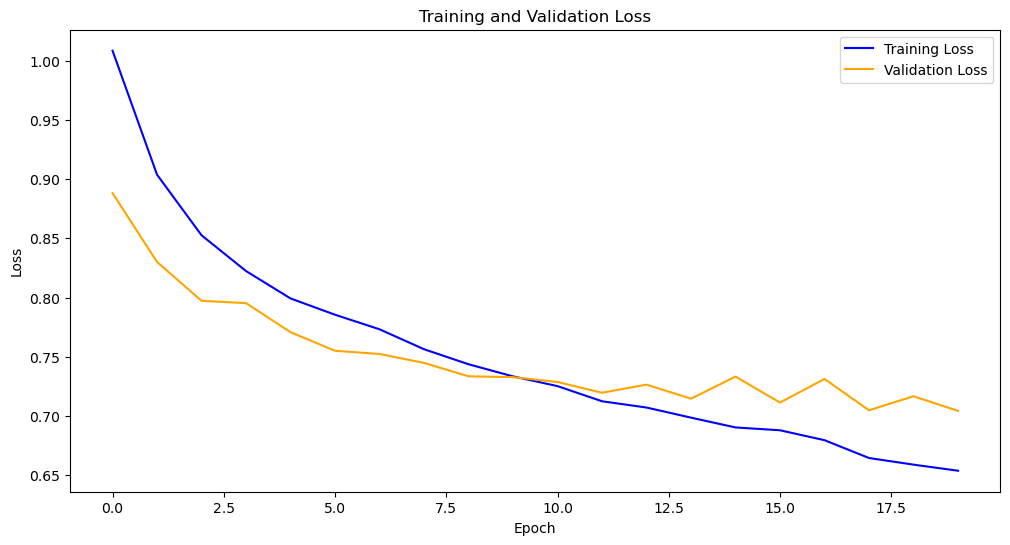

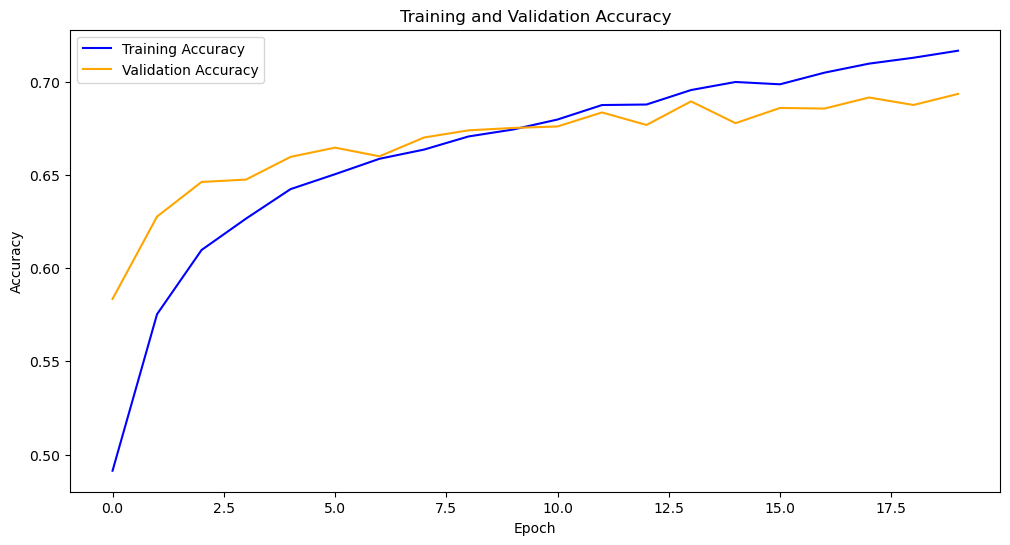

In [116]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the final model
best_model.save('final_multiclass_sentiment_model.keras')
print("Final model saved as 'final_multiclass_sentiment_model.keras'.")